# Lab 05 - Task

## Perceptron algorithm to the Iris dataset

# 1. Load the iris dataset using scikit-learn library

In [32]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load iris dataset
iris = load_iris()

# 2. Create a Pandas DataFrame with the dataset and add column names

In [33]:
# Create a Pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target column to the DataFrame
df['target'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
df.shape

(150, 5)

In [35]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# 3. Convert the problem into a binary classification problem by only considering two classes and removing the third one. For example, we can keep only "setosa" and "versicolor" classes and remove "virginica".

In [38]:
# Keep only "setosa" and "versicolor" classes
df = df[df['target'] != 2]

In [39]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


# Visualize the data using scatter plot

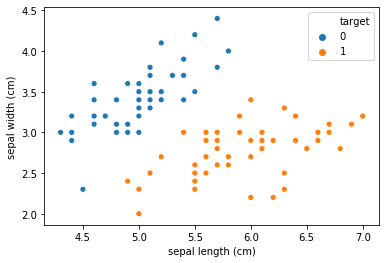

In [40]:
# Create a scatter plot
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target')

# Show the plot
import matplotlib.pyplot as plt
plt.show()

# Split the data into train and test sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['target'], test_size=0.2, random_state=42)

In [42]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
55,5.7,2.8,4.5,1.3
88,5.6,3.0,4.1,1.3
26,5.0,3.4,1.6,0.4
42,4.4,3.2,1.3,0.2
69,5.6,2.5,3.9,1.1
...,...,...,...,...
60,5.0,2.0,3.5,1.0
71,6.1,2.8,4.0,1.3
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [43]:
X_train.shape

(80, 4)

In [44]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
83,6.0,2.7,5.1,1.6
53,5.5,2.3,4.0,1.3
70,5.9,3.2,4.8,1.8
45,4.8,3.0,1.4,0.3
44,5.1,3.8,1.9,0.4
39,5.1,3.4,1.5,0.2
22,4.6,3.6,1.0,0.2
80,5.5,2.4,3.8,1.1
10,5.4,3.7,1.5,0.2
0,5.1,3.5,1.4,0.2


In [45]:
X_test.shape

(20, 4)

In [46]:
y_train

55    1
88    1
26    0
42    0
69    1
     ..
60    1
71    1
14    0
92    1
51    1
Name: target, Length: 80, dtype: int64

In [47]:
y_train.shape

(80,)

In [48]:
y_test

83    1
53    1
70    1
45    0
44    0
39    0
22    0
80    1
10    0
0     0
18    0
30    0
73    1
33    0
90    1
4     0
76    1
77    1
12    0
31    0
Name: target, dtype: int64

In [49]:
y_test.shape

(20,)

# 6. Apply the built-in Perceptron algorithm from scikit-learn

In [50]:
# Create an instance of the Perceptron algorithm
perceptron = Perceptron()

# Fit the model on the training data
perceptron.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

# Evaluate the accuracy, precision, recall, and F1 score of the model.

In [51]:
# Make predictions on the test data
y_pred = perceptron.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


# Apply the Perceptron algorithm from scratch using above code snippets

In [52]:
def train_weights(train, l_rate, n_epoch):
    
    weights = [0.0 for i in range(len(train[0]))]
    
    for epoch in range(n_epoch):
        
        sum_error = 0.0
        
        for row in train:
            
            prediction = predict(row, weights)
            
            error = row[-1] - prediction
            
            sum_error += error**2
            
            weights[0] = weights[0] + l_rate * error  #bias(t+1) = bias(t) + learning_rate * (expected(t) - predicted(t))
            
            for i in range(len(row)-1):
                
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i] #w(t+1) = w(t) + learning_rate * (expected(t) - predicted(t)) * x(t)
                
        print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        
    return weights


In [53]:
def predict(row, weights):
#     bias value at weights[0]
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

# Apply the Perceptron algorithm from scratch using above code snippets

In [54]:
# Define the learning rate and number of epochs
l_rate = 0.01
n_epoch = 50

# Train the model on the training data
weights = train_weights(X_train.values, l_rate, n_epoch)

# Make predictions on the test data
y_pred = [predict(row, weights) for row in X_test.values]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


epoch=0, lrate=0.010, error=23.580
epoch=1, lrate=0.010, error=20.380
epoch=2, lrate=0.010, error=20.780
epoch=3, lrate=0.010, error=20.780
epoch=4, lrate=0.010, error=20.180
epoch=5, lrate=0.010, error=20.380
epoch=6, lrate=0.010, error=21.380
epoch=7, lrate=0.010, error=20.780
epoch=8, lrate=0.010, error=20.780
epoch=9, lrate=0.010, error=21.380
epoch=10, lrate=0.010, error=20.580
epoch=11, lrate=0.010, error=20.580
epoch=12, lrate=0.010, error=21.180
epoch=13, lrate=0.010, error=21.180
epoch=14, lrate=0.010, error=20.780
epoch=15, lrate=0.010, error=20.580
epoch=16, lrate=0.010, error=21.180
epoch=17, lrate=0.010, error=20.780
epoch=18, lrate=0.010, error=21.180
epoch=19, lrate=0.010, error=20.780
epoch=20, lrate=0.010, error=21.380
epoch=21, lrate=0.010, error=20.780
epoch=22, lrate=0.010, error=20.780
epoch=23, lrate=0.010, error=21.380
epoch=24, lrate=0.010, error=20.780
epoch=25, lrate=0.010, error=21.380
epoch=26, lrate=0.010, error=20.780
epoch=27, lrate=0.010, error=21.380
ep

# 9. Evaluate the accuracy, precision, recall, and F1 score of the model.

In [55]:
# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.55
Precision: 0.47058823529411764
Recall: 1.0
F1 score: 0.6399999999999999
